<h4> SALES ANALYSIS </h4>

In [14]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt


In [15]:
import os

In [16]:
files = [file for file in os.listdir('Project2_Jupyter')]
all_months = DataFrame()
for file in files:
     df = pd.read_csv('Project2_Jupyter/'+file)
     all_months = pd.concat([all_months,df])

all_months.to_csv('all_months.csv', index = False)


In [17]:
#Cleaning the database

In [18]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [19]:
all_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [20]:
all_months.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [34]:
#Extracting the Months from 'Order Date'

In [22]:
all_months['months'] = all_months["Order Date"].str.split('/').str[0]

In [24]:
#Handling the NaNs in our data

In [23]:
nan_df = all_months[all_months.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
all_months = all_months.dropna(how='all')

In [33]:
#Handling non numeric characters in our 'Order Date' Column (which also cleans up our 'months' Column).

In [27]:
all_months = all_months[all_months['Order Date'].str[0:2] != 'Or']
all_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [28]:
#Changing the data type to suitable one for analysis

In [29]:
all_months.loc[:, 'months'] = all_months['months'].astype('int32')
all_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [30]:
#Building a Sales Column as well as converting the 'Price Each' and 'Quantity Ordered' Column to their suitable data types.

In [31]:
all_months.loc[:,'Quantity Ordered'] = pd.to_numeric(all_months['Quantity Ordered'])
all_months.loc[:,'Price Each'] = pd.to_numeric(all_months['Price Each'])                                                    


all_months.loc[:,'Sales'] = (all_months['Quantity Ordered'] * all_months['Price Each']).astype('float64')

In [32]:
#Extracting the city from the 'Purchase Address'.

In [35]:
def get_city(address):
    return  address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_months['City'] = all_months['Purchase Address'].apply(lambda x : f'{get_city(x)} ({get_state(x)})' )
all_months.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


1. What were the total Sales by the months?

In [36]:
monthly_sales= all_months.groupby('months').sum()['Sales'].reset_index()

In [37]:
from matplotlib.ticker import FuncFormatter

In [38]:
#Converting to millions for effective readability.
def converter_mn(x,unit):
    return f'{x / 1e6:.1f}M'

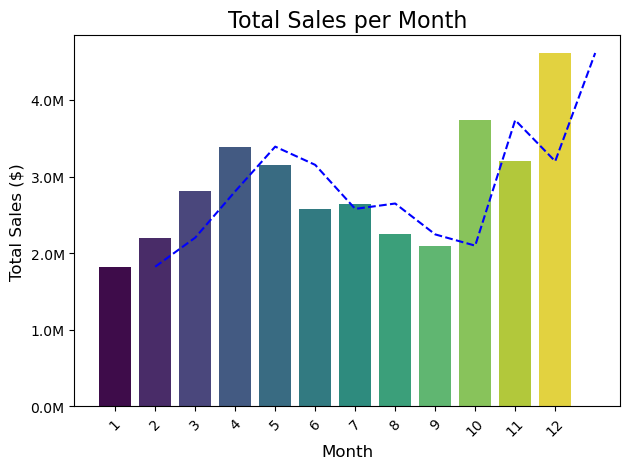

In [39]:

fig,axis1 = plt.subplots()
graph= sns.barplot(x='months', y='Sales', hue= 'months', legend= False, data=monthly_sales, palette='viridis',ax=axis1)
sns.lineplot(x='months', y='Sales',data=monthly_sales, linestyle='--', color= 'blue', ax=axis1)

graph.yaxis.set_major_formatter(FuncFormatter(converter_mn))
plt.title('Total Sales per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We get to know that the December month recorded the highest sales. This might be due to the festive season w.r.t to Christmas that led to the jump in the sales. 

In [20]:
all_months.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)


2. What were the total Sales proportion per city?

In [21]:
results= all_months.groupby('City').sum()['Sales'].reset_index()

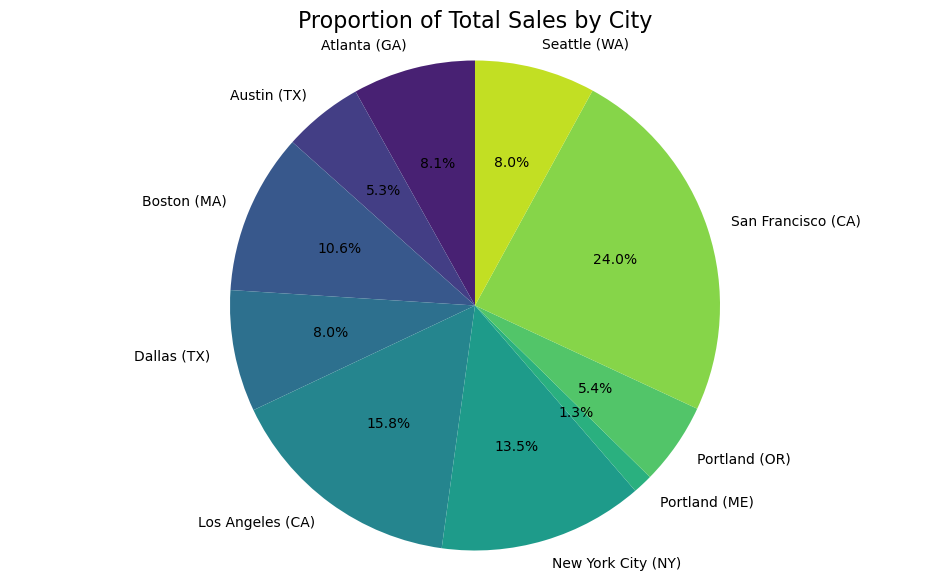

In [22]:
plt.figure(figsize=(12, 7))
plt.pie(
    results['Sales'],
    labels=results['City'],
    autopct='%1.1f%%',
    startangle=90,     
    colors=sns.color_palette('viridis', len(results['City'])))
plt.title('Proportion of Total Sales by City', fontsize=16)
plt.axis('equal')
plt.show()

In US, San Francisco contributes significantly to the Total Sales. The data is based on the sales of electronic items and the plot truly reflects this. San Francisco, being the hub of Silicon Valley is the major inference that we can get to back our analysis.

In [40]:
#Correcting the datatype
def datetime(date):
    return pd.to_datetime(date, format= '%m/%d/%y %H:%M')


all_months['Order Date'] = all_months['Order Date'].apply(lambda x : datetime(x))      

In [10]:
#Creating an 'Hours' Column

In [30]:
all_months['Hours'] = all_months['Order Date'].dt.hour

In [41]:
all_months.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)


3. In which Time Frame, Sales were recorded highest?

In [35]:
dframe= all_months.groupby('Hours')['Sales'].sum().reset_index()

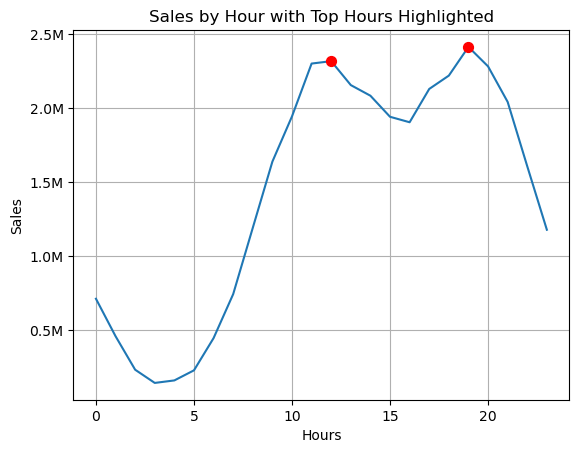

In [41]:
plot= sns.lineplot(x='Hours', y='Sales', data= dframe)
plot.yaxis.set_major_formatter(FuncFormatter(converter_mn))

top_sales_hours = dframe.nlargest(2, 'Sales')['Hours']
top_sales_values = dframe.nlargest(2, 'Sales')['Sales']

plt.scatter(top_sales_hours, top_sales_values, color='red', s=50, zorder=5)
plt.title('Sales by Hour with Top Hours Highlighted')
plt.grid()
plt.show()

We analysed that around 12 am in the noon and 7 pm in the evening we recorded the top sales. Hence we should target these major timings for our advertisement and email marketing like strategies to catch consumer attention.

In [42]:
all_months.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)


4. Which pair of products that were sold with same Order ID, occurred most commonly?

In [44]:
df = all_months[all_months['Order ID'].duplicated(keep= False)].copy()
df.loc[:,'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

In [45]:
df= df[['Order ID', 'Grouped']].drop_duplicates()

In [46]:
df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [47]:
#counting the pairs --Required Internet Help

from itertools import combinations
from collections import Counter

count= Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
    print(key,value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


We see that 'iPhone' and ' Lightning Charging Cable' are usually sold together, most commonly and this shows the interdependency of these products w.r.t consumers utility and product design.

5. How much quantity is ordered for each product, along with the distribution of their Prices?

In [68]:
quantity_sold= all_months.groupby('Product')['Quantity Ordered'].sum().reset_index()
mean_price= all_months.groupby('Product')['Price Each'].mean().reset_index()

products = quantity_sold['Product'].tolist()

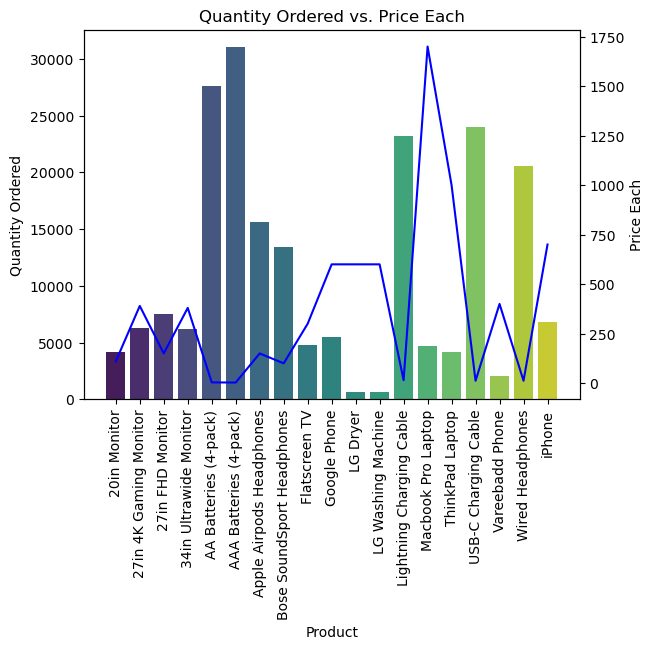

In [71]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x='Product', y='Quantity Ordered', data=quantity_sold, hue='Product', legend= False, palette= 'viridis', ax=ax1)
sns.lineplot(x='Product', y='Price Each',data=mean_price, color= 'blue', ax=ax2)

ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical')
plt.title('Quantity Ordered vs. Price Each')
plt.show()

Law of demand is clearly been shown in the graph. The higher the price of the product the lesser the Quantity Ordered. Hence we see AAA Batteries recorded the highest sales (and also have comparitively lower prices). However exception can be seen in case of Macbook Pro Laptop where consumers prefer to see more about Brand's idenitity and the specific utility of the product rather than its price.

6. How Product Sales were distributed over the months?

In [101]:
all_months.loc[:,'Years'] = all_months['Order Date'].dt.year
all_months.drop('Years', axis=1, inplace=True)
sales_distribution = all_months.pivot_table(
    index='Product',
    columns='months',
    values='Sales',
    aggfunc='sum'
).fillna(0)
sales_distribution.head(2)


months,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
20in Monitor,23977.82,27057.54,35856.74,43226.07,37506.59,35416.78,35966.73,28707.39,30467.23,47185.71,46195.80,62584.31
27in 4K Gaming Monitor,122066.87,166525.73,186805.21,220734.34,211374.58,175885.49,188365.17,171595.60,148586.19,281962.77,224244.25,336951.36


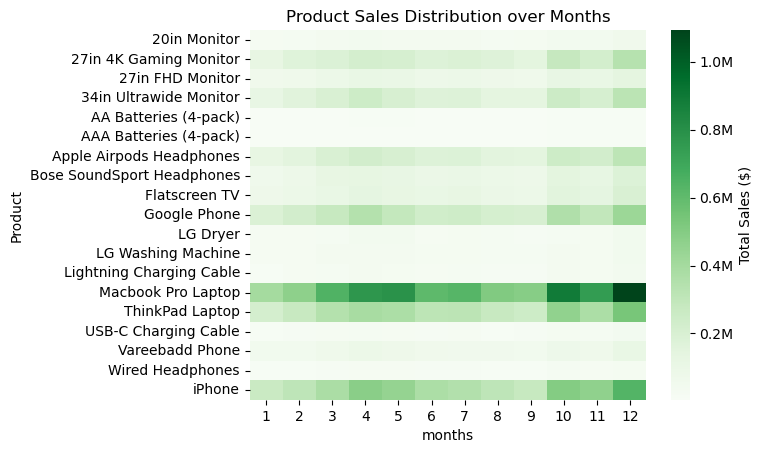

In [99]:
sns.heatmap(sales_distribution,  cmap='Greens',
           cbar_kws={'label': 'Total Sales ($)', 'format': FuncFormatter(converter_mn)})
plt.title('Product Sales Distribution over Months')
plt.show()

Christmas effect is truly onboard. We find Macbook Pro Laptop and also iphone contributing higher sales than others over the months. AAA Batteries, even though were the largest quantity ordered but due to their low prices, their sales didn't have a significant impact to overall sales, and remain mostly consistent over the months.

Thank You!